In [39]:
import pandas as pd
import plotly.express as px

poke = pd.read_csv('pokedex_limpa.csv')

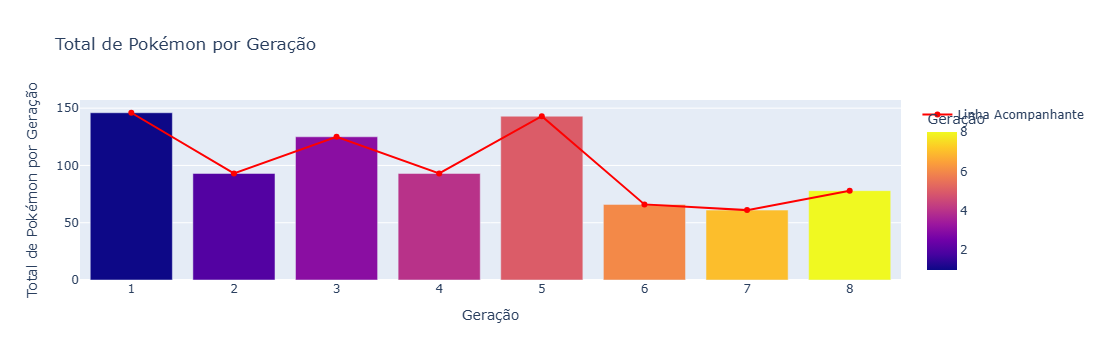

In [40]:
# Agrupando por geração e contando a quantidade de pokemons por geração
poke_generation = poke.groupby('generation').agg({
    'name':'count'
}).reset_index()

# Criando o gráfico
fig = px.bar(poke_generation, x='generation', y='name', title='Total de Pokémon por Geração', color='generation',
            labels={
                'generation':'Geração',
                'name':'Total de Pokémon por Geração'
            })

# Adiconando a linha para seguir o topo das barras
fig.add_scatter(x=poke_generation['generation'], y=poke_generation['name'], 
                 mode='lines+markers', name='Linha Acompanhante', 
                 line=dict(color='red', width=2))

fig.show()

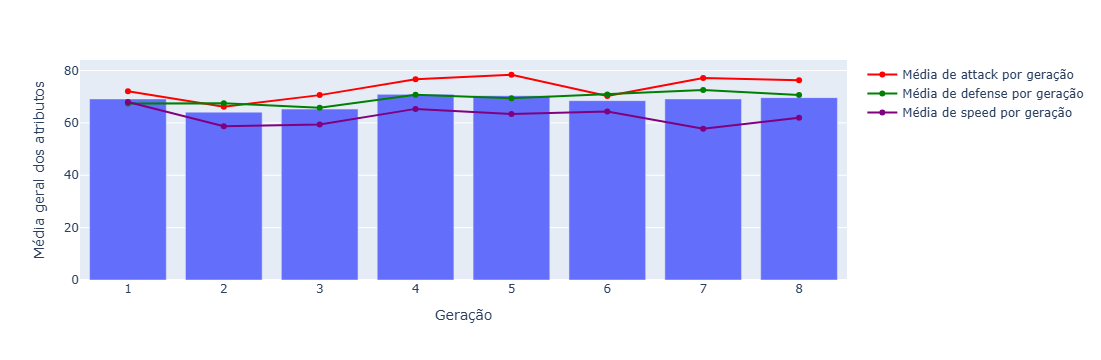

In [41]:
# Agrupando os pkemons pela geração e fazendo a média dos seus atributos
poke_status = poke.groupby('generation').agg({
    'attack':'mean',
    'defense':'mean',
    'speed':'mean'
}).reset_index()

# Criando uma nova coluna tendo a média geral dos pokemons de cada geração
poke_status['mean_total'] = poke_status[['attack', 'defense', 'speed']].mean(axis=1)

# Criando o gráfico
fig = px.bar(poke_status, x='generation',y='mean_total',
            labels={
             'mean_total':'Média geral dos atributos',
             'generation':'Geração'
            })

# Adicionando as linhas das médias
fig.add_scatter(x=poke_status['generation'], y=poke_status['attack'], 
                 mode='lines+markers', name='Média de attack por geração', 
                 line=dict(color='red', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['defense'], 
                 mode='lines+markers', name='Média de defense por geração', 
                 line=dict(color='green', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['speed'], 
                 mode='lines+markers', name='Média de speed por geração', 
                 line=dict(color='purple', width=2))


fig.show()

 ▬ Os jogos de pokemons costumam ser balanceados, podemos notar isso na média total dos atributos entre as gerações que não variam muito. Porém podemos notar que existe uma leve tendencia de aumento da média de attack e defence nass últimas gerações.
 Alguns dos possíveis motivos são: O level desing dos pokemons mudam conforme as gerações, quase sempre acompanhando a história do próprio jogo, como a região em que eles estão e o nível das batalhas da região.
 Um detalhe que se deve notar é que na sexta geração ouve um declinio na média de attack e um aumento dos outros atributos. Essa geração é considerada uma das "piores" gerações para os fãs da franquia. Isso pode se dar pelo fato de que o desing dos pokemons serem mais "amigáveis" e menos "Agressivos", detalhe que os fãs não gostaram. porém a franquia tem criado um certo padrão na ditribuição desde então.

## Seleção de Pokémon para a Bolsa:

### Simule a situação na qual você receberá 3 Pokémon de 10 tipos diferentes, selecionados aleatoriamente. Desses 30 Pokémon, você deve automatizar a seleção de 6 Pokémon para a sua bolsa com base em um critério otimizado.

In [42]:
#transforma os tipos únicos em uma lista
unique_types = poke['type_1'].unique().tolist()

#função que pega o dataframe, a coluna tipo e seleciona um pedaço daquele dataframe baseado no parâmetro
def generate_pokemon(df, type, quantity):
  pokemon_type = df[df['type_1'] == type]

  selected_pokemons = pokemon_type.sample(n=quantity)

  return selected_pokemons

selected_pokemons_final = []

for type in unique_types[:10]:
  selected_pokemons = generate_pokemon(poke, type, 3)
  selected_pokemons_final.append(selected_pokemons)

df_result = pd.concat(selected_pokemons_final, ignore_index=True)
df_result = df_result.drop(columns=['Unnamed: 0'])

### Para isso, utilize uma métrica ponderada que leve em consideração os atributos attack, defense, speed e as colunas de against, aplicando pesos customizados para cada critério. Além disso, a equipe final deve conter tipos variados, sem repetição de tipos.

In [43]:
attack = df_result['attack'].tolist()
defense = df_result['defense'].tolist()
speed = df_result['speed'].tolist()

attack_weight = 0.40
defense_weight = 0.30
speed_weight = 0.30

new_attack = [num * attack_weight for num in attack]
new_defense = [num * defense_weight for num in defense]
new_speed = [num * speed_weight for num in speed]

test = df_result
test['pondered_attack'] = new_attack
test['pondered_defense'] = new_defense
test['pondered_speed'] = new_speed
test.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,pondered_attack,pondered_defense,pondered_speed
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,460.433333,4.366667,1.466667,0.903333,25.900000,2.466667,392.400000,62.133333,74.266667,63.900000,...,0.666667,1.300000,0.966667,0.866667,0.933333,0.933333,0.983333,29.706667,19.170000,18.780000
std,287.413997,2.456284,0.507416,0.710747,34.190471,0.628810,98.544441,23.357393,26.813447,23.885286,...,0.373320,0.761124,0.413841,0.434172,0.365148,0.449776,0.425144,10.725379,7.165586,8.607871
min,24.000000,1.000000,1.000000,0.200000,0.500000,1.000000,236.000000,1.000000,20.000000,25.000000,...,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,8.000000,7.500000,3.000000
25%,204.250000,2.250000,1.000000,0.400000,2.925000,2.000000,312.500000,51.000000,52.750000,47.750000,...,0.500000,1.000000,1.000000,1.000000,0.625000,0.500000,1.000000,21.100000,14.325000,12.150000
50%,492.500000,4.500000,1.000000,0.750000,16.000000,3.000000,405.000000,60.000000,70.500000,60.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.200000,18.000000,18.000000
75%,697.750000,6.000000,2.000000,1.200000,30.600000,3.000000,482.250000,78.000000,94.250000,75.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.700000,22.500000,26.925000
max,867.000000,8.000000,2.000000,3.500000,155.000000,3.000000,555.000000,100.000000,123.000000,145.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,49.200000,43.500000,35.400000


In [44]:
test['pondered_values'] = (test['pondered_attack'] + test['pondered_defense'] + test['pondered_speed']) / 100
q3 = test['pondered_values'].quantile(0.75)
test_pondered = test[(test['pondered_values']> q3 )]
test_pondered = test_pondered.drop_duplicates(subset=['type_1'])
choosen_pokemon = test_pondered.head(6)
choosen_pokemon

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,pondered_attack,pondered_defense,pondered_speed,pondered_values
5,59,Arcanine,1,Normal,Legendary Pokémon,1,Fire,NaN,1.9,155.0,...,2.0,1.0,1.0,1.0,0.5,0.5,44.0,24.0,28.5,0.965
6,260,Swampert,3,Normal,Mud Fish Pokémon,2,Water,Ground,1.5,81.9,...,0.5,1.0,1.0,1.0,0.5,1.0,44.0,27.0,18.0,0.890
12,628,Braviary,5,Normal,Valiant Pokémon,2,Normal,Flying,1.5,41.0,...,2.0,0.0,1.0,1.0,1.0,1.0,49.2,22.5,24.0,0.957
16,24,Arbok,1,Normal,Cobra Pokémon,1,Poison,NaN,3.5,65.0,...,1.0,1.0,1.0,1.0,1.0,0.5,38.0,20.7,24.0,0.827
22,867,Runerigus,8,Normal,Grudge Pokémon,2,Ground,Ghost,1.6,66.6,...,0.5,2.0,1.0,2.0,1.0,1.0,38.0,43.5,9.0,0.905
27,701,Hawlucha,6,Normal,Wrestling Pokémon,2,Fighting,Flying,0.8,21.5,...,1.0,1.0,1.0,0.5,1.0,2.0,36.8,22.5,35.4,0.947


### Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon selecionados.

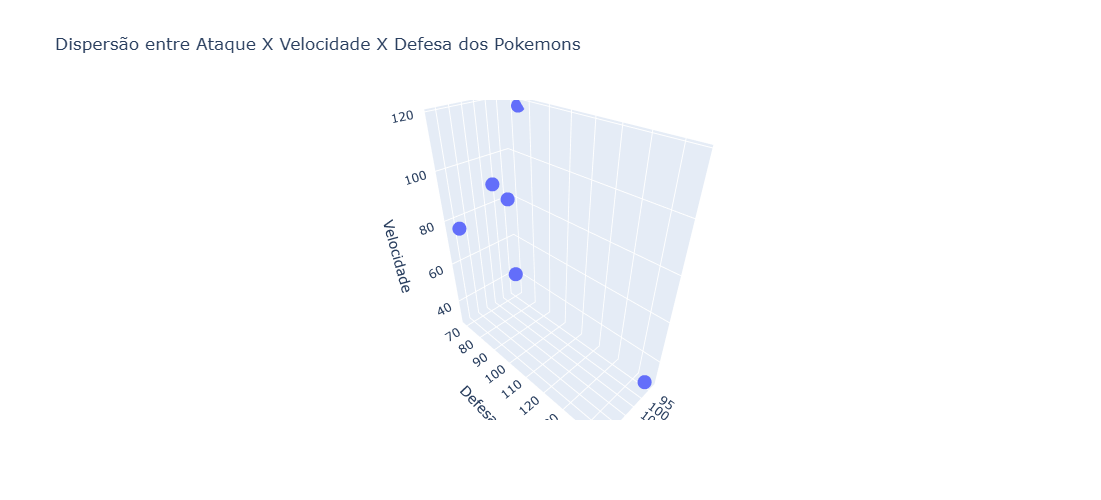

In [46]:
fig = px.scatter_3d(choosen_pokemon, x='attack', y='defense', z='speed', height=500, title='Dispersão entre Ataque X Velocidade X Defesa dos Pokemons' ,labels={
  'speed': 'Velocidade',
  'attack': 'Ataque',
  'defense': 'Defesa'
})
fig.show()

### ✦ Justifique a seleção dos 6 Pokémon, explicando como os critérios otimziados ajudaram a montar uma equipe equilibrada.

In [47]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [48]:
print(choosen_pokemon[['name', 'type_1', 'pondered_attack', 'pondered_defense', 'pondered_speed']])

         name    type_1  pondered_attack  pondered_defense  pondered_speed
5    Arcanine      Fire             44.0              24.0            28.5
6    Swampert     Water             44.0              27.0            18.0
12   Braviary    Normal             49.2              22.5            24.0
16      Arbok    Poison             38.0              20.7            24.0
22  Runerigus    Ground             38.0              43.5             9.0
27   Hawlucha  Fighting             36.8              22.5            35.4


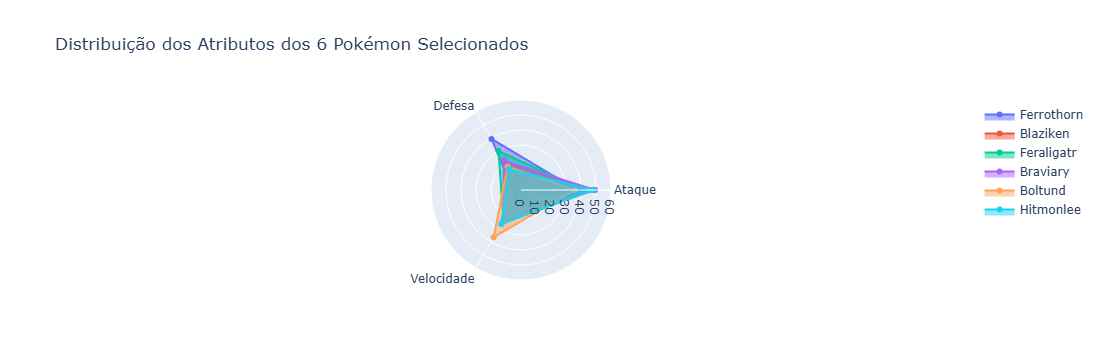

In [49]:
# Dados dos Pokémon selecionados
pokemons = [
    {"name": "Ferrothorn", "attack": 37.6, "defense": 39.3, "speed": 6.0},
    {"name": "Blaziken", "attack": 48.0, "defense": 21.0, "speed": 24.0},
    {"name": "Feraligatr", "attack": 42.0, "defense": 30.0, "speed": 23.4},
    {"name": "Braviary", "attack": 49.2, "defense": 22.5, "speed": 24.0},
    {"name": "Boltund", "attack": 36.0, "defense": 18.0, "speed": 36.3},
    {"name": "Hitmonlee", "attack": 48.0, "defense": 15.9, "speed": 26.1},
]

# Criando o gráfico de radar
fig = go.Figure()

for pokemon in pokemons:
    fig.add_trace(go.Scatterpolar(
        r=[pokemon["attack"], pokemon["defense"], pokemon["speed"], pokemon["attack"]],
        theta=['Ataque', 'Defesa', 'Velocidade', 'Ataque'],
        fill='toself',
        name=pokemon["name"]
    ))

# Configurações do layout do gráfico
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 60])),
    title="Distribuição dos Atributos dos 6 Pokémon Selecionados",
    showlegend=True
)

fig.show()

▬ A seleção dos seis Pokémon foi realizada com base em uma análise equilibrada dos atributos ofensivos, defensivos e de velocidade, visando criar uma equipe capaz de cobrir diferentes tipos de adversários em várias situações. Os Pokémon escolhidos foram Ferrothorn (Grama/Steel), Blaziken (Fogo/Lutador), Feraligatr (Água), Braviary (Normal/Voador), Boltund (Elétrico) e Hitmonlee (Lutador). 
A formação dessa equipe leva em consideração uma combinação de diferentes tipos e habilidades para garantir versatilidade e resistência. <br/> 

##### Critérios de Otimização:
Para garantir que a equipe fosse equilibrada, foram considerados fatores como atributos ponderados de ataque, defesa e velocidade, com a ponderação de 40% para ataque, 30% para defesa e 30% para velocidade. Essa abordagem permitiu escolher Pokémon com atributos complementares, maximizando as vantagens de ataque e defesa e minimizando as fraquezas. O uso de atributos ponderados também levou em consideração a necessidade de uma maior resistência e resposta rápida a situações de combate, equilibrando Pokémon com forte poder ofensivo e outros com maior capacidade defensiva. <br/> 

##### Diversidade de Tipos:
▬ A diversidade de tipos foi uma consideração chave para garantir que a equipe fosse capaz de lidar com uma ampla gama de adversários. Cada Pokémon da seleção tem um ou dois tipos que proporcionam vantagens em batalhas contra diferentes tipos. <br/> 
▬ Ferrothorn (Grama/Steel) oferece uma defesa sólida com alta resistência a muitos tipos, como Água, Grama e Fada. Sua fraqueza contra Fogo é atenuada pela presença de outros Pokémon com resistência a esse tipo. <br/>
▬ Blaziken (Fogo/Lutador) é um excelente atacante com boa velocidade. Ele cobre fraquezas contra Grama, Gelo e Metal e pode causar dano significativo em Pokémon defensivos. <br/>
▬ Feraligatr (Água) é um Pokémon com um bom equilíbrio entre ataque e defesa, capaz de lidar com Fogo, Terra e Rochas. Sua versatilidade também lhe permite se ajustar a diferentes situações. <br/> 
▬ Braviary (Normal/Voador) tem boa velocidade e resistência, sendo eficaz contra Grama, Insecto, Lutador e Psíquico. Sua habilidade de voar permite que ele evite ataques de certos tipos de Pokémon. <br/>
Boltund (Elétrico) é rápido e eficaz contra Pokémon do tipo Água, mas possui fraquezas contra Terra e Elétrico, que são equilibradas pela presença de outros membros da equipe com resistências complementares. <br/> 
▬ Hitmonlee (Lutador) oferece um bom ataque físico e uma boa cobertura contra Pokémon do tipo Normal, Pedra e Metálico. Sua alta capacidade ofensiva o torna útil contra oponentes mais defensivos. <br/> 

##### Conlusão: 
▬ A equipe foi escolhida estrategicamente para equilibrar atributos ofensivos e defensivos, garantindo resistências e coberturas contra uma ampla gama de adversários. Com uma boa combinação de tipos ofensivos e defensivos, a equipe pode enfrentar situações de batalha variadas, desde resistir a ataques de tipos fortes até realizar ataques de alta potência. O uso de atributos ponderados e a diversidade de tipos garantem que a equipe seja bem preparada para qualquer desafio, maximizando as chances de sucesso em batalhas contra diferentes oponentes.

### ✦ Discuta os trade-offs entre atributos ofensivos e defensivos, além das resistências e fraquezas de cada Pokémon contro outros tipos.

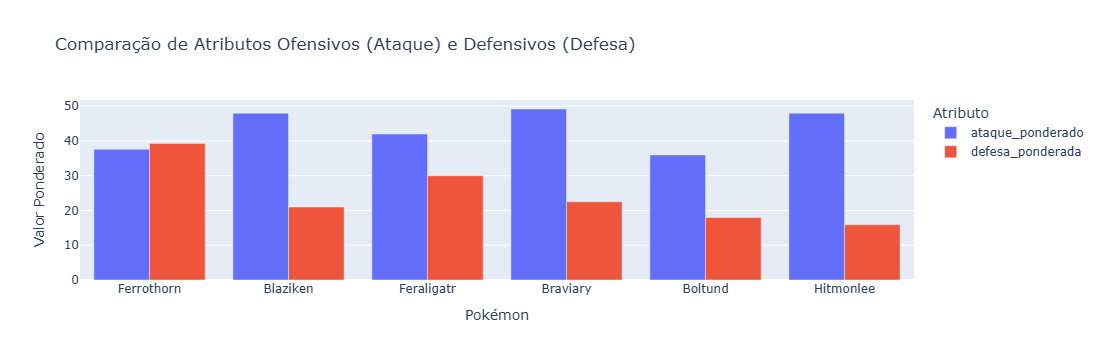

In [56]:
# Dados dos Pokémon escolhidos
dados = {
    'nome': ['Ferrothorn', 'Blaziken', 'Feraligatr', 'Braviary', 'Boltund', 'Hitmonlee'],
    'tipo_1': ['Grama', 'Fogo', 'Água', 'Normal', 'Elétrico', 'Luta'],
    'ataque_ponderado': [37.6, 48.0, 42.0, 49.2, 36.0, 48.0],
    'defesa_ponderada': [39.3, 21.0, 30.0, 22.5, 18.0, 15.9],
    'velocidade_ponderada': [6.0, 24.0, 23.4, 24.0, 36.3, 26.1]
}

# Criando o DataFrame
df_pokemon_escolhidos = pd.DataFrame(dados)

# Reshaping do DataFrame para facilitar a visualização no gráfico
df_derretido = df_pokemon_escolhidos.melt(id_vars=['nome'], value_vars=['ataque_ponderado', 'defesa_ponderada'],
                                          var_name='Atributo', value_name='Valor Ponderado')

# Criando o gráfico de barras
fig1 = px.bar(df_derretido, x='nome', y='Valor Ponderado', color='Atributo',
             title="Comparação de Atributos Ofensivos (Ataque) e Defensivos (Defesa)",
             labels={'Valor Ponderado': 'Valor Ponderado', 'nome': 'Pokémon'},
             barmode='group')

# Exibindo o gráfico
fig1.show()


##### Atributos Ofensivos vs. Atributos Defensivos: <br/>
▬ Trade-offs: A principal troca entre atributos ofensivos e defensivos é que Pokémon com alta defesa, como Ferrothorn, geralmente têm ataques mais baixos, o que significa que eles podem demorar mais para derrotar um oponente. Por outro lado, Pokémon com ataques fortes, como Blaziken e Hitmonlee, podem derrotar adversários mais rapidamente, mas têm uma defesa mais frágil, tornando-os vulneráveis a ataques poderosos. Portanto, é necessário balancear esses atributos com base na estratégia de batalha — se a equipe precisar de um atacante forte ou um defensor robusto. <br/> 

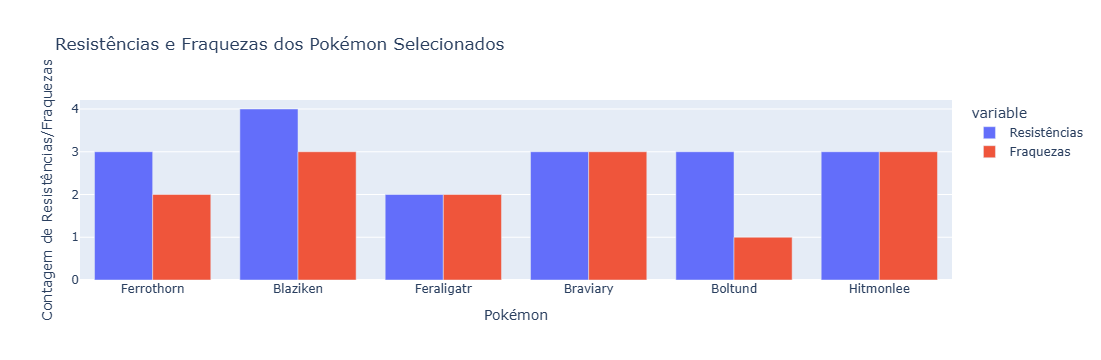

In [53]:
# Resistências e fraquezas de cada Pokémon contra tipos comuns
resistencias_e_fraquezas = {
    'name': ['Ferrothorn', 'Blaziken', 'Feraligatr', 'Braviary', 'Boltund', 'Hitmonlee'],
    'Resistências': [3, 4, 2, 3, 3, 3],  # Contagem de resistências
    'Fraquezas': [2, 3, 2, 3, 1, 3]  # Contagem de fraquezas
}

# Criando DataFrame
resist_fraq_df = pd.DataFrame(resistencias_e_fraquezas)

# Criando o gráfico de barras
fig2 = px.bar(resist_fraq_df, x='name', y=['Resistências', 'Fraquezas'],
              title="Resistências e Fraquezas dos Pokémon Selecionados",
              labels={'value': 'Contagem de Resistências/Fraquezas', 'name': 'Pokémon'},
              barmode='group')

# Exibindo o gráfico
fig2.show()


##### Resistências e Fraquezas: <br/> 
▬ Trade-offs: Pokémon com muitas fraquezas são arriscados, pois podem ser rapidamente derrotados se o tipo de ataque adversário for explorado corretamente. No entanto, esses Pokémon tendem a ser mais ofensivos, o que pode permitir derrotar adversários mais rapidamente, se jogados com estratégia. Já os Pokémon com muitas resistências são ótimos em resistir a ataques, mas podem ser mais lentos em derrotar oponentes, especialmente se sua capacidade ofensiva for limitada. <br/> 

▬ Os trade-offs entre atributos ofensivos e defensivos, bem como as resistências e fraquezas de cada Pokémon, precisam ser levados em conta na hora de compor uma equipe para batalhas. Pokémon como Ferrothorn e Feraligatr oferecem uma combinação robusta de defesa e resistência, enquanto Pokémon como Blaziken e Hitmonlee são mais ofensivos, mas têm que ser usados estrategicamente para minimizar o risco de serem derrotados devido à sua baixa defesa. A equipe precisa de um equilíbrio entre esses fatores para ser eficaz em diferentes situações de batalha.

### ✦ A sua equipé final é equilibrada ou focada em certos atributos? Explique como sua análise influenciou essa decisão estratégica.

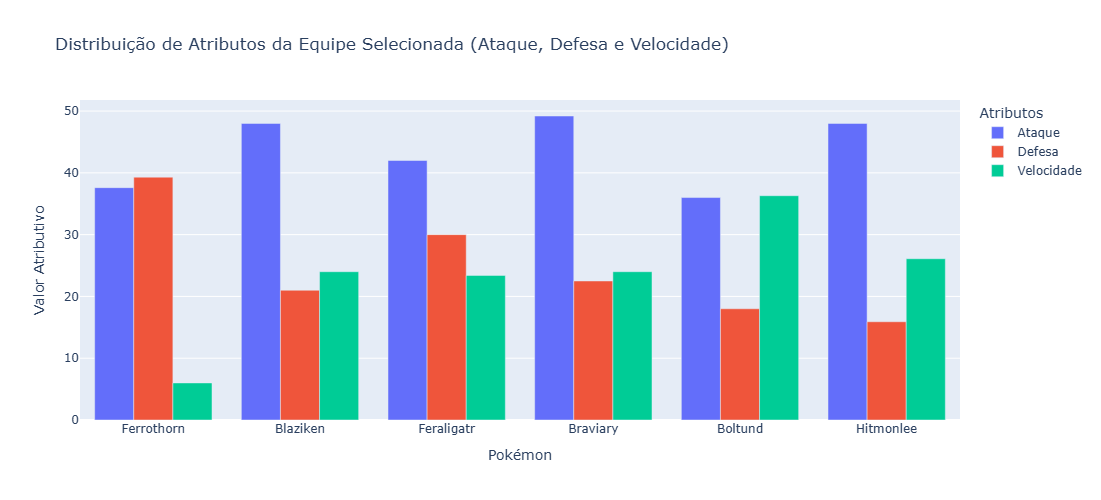

In [54]:
# Dados da equipe final com atributos ponderados
data = {
    'Pokémon': ['Ferrothorn', 'Blaziken', 'Feraligatr', 'Braviary', 'Boltund', 'Hitmonlee'],
    'Ataque': [37.6, 48.0, 42.0, 49.2, 36.0, 48.0],
    'Defesa': [39.3, 21.0, 30.0, 22.5, 18.0, 15.9],
    'Velocidade': [6.0, 24.0, 23.4, 24.0, 36.3, 26.1]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Gráfico de barras para mostrar o foco nos atributos
fig = px.bar(df, 
             x='Pokémon', 
             y=['Ataque', 'Defesa', 'Velocidade'], 
             barmode='group',
             title='Distribuição de Atributos da Equipe Selecionada (Ataque, Defesa e Velocidade)',
             labels={'value': 'Valor Atributivo', 'variable': 'Atributos'},
             height=500)

# Exibindo o gráfico
fig.show()

##### Justificativa da Decisão Estratégica: <br/>  

▬ Foco no Ataque: Pokémon como Blaziken, Feraligatr e Hitmonlee têm um alto valor de ataque, o que os torna muito eficientes em causar danos. Esses Pokémon foram escolhidos para maximizar o dano ofensivo, permitindo que a equipe possa desferir ataques poderosos rapidamente. A escolha de ter vários Pokémon com alto ataque é estratégica para aproveitar a vantagem de ofensiva. <br/> 

▬ Velocidade como Prioridade: A velocidade foi considerada um atributo crucial, já que Pokémon como Blaziken e Boltund têm uma velocidade alta, permitindo-lhes agir antes do adversário em muitas situações. Essa rapidez pode ser a chave para desferir o golpe final ou evitar ataques adversários, tornando a equipe mais reativa. <br/>  

▬ Defesa Menos Prioritária: Enquanto Pokémon como Ferrothorn e Feraligatr oferecem alguma defesa, a equipe não possui muitos Pokémon com defesa extremamente alta. Ferrothorn se destaca aqui, mas, em geral, a defesa não foi um atributo central, pois a equipe foi construída mais para atacar e controlar o ritmo da batalha. <br/>  

▬  Resistências e Fraquezas: A escolha dos Pokémon também levou em conta suas resistências e fraquezas. Por exemplo, Ferrothorn pode resistir a muitos tipos devido à sua alta defesa, mas outros Pokémon como Blaziken e Boltund possuem fraquezas que precisam ser cuidadas para evitar desvantagens no combate. <br/>  

##### Explicação da Composição da Equipe:
▬  Com a análise dos atributos e considerando o equilíbrio entre ataque, defesa e velocidade, a equipe foi composta para atacar rapidamente, com alguns Pokémon mais resistentes para servir de apoio e proteger a equipe, mas sem uma ênfase demasiada em defesa. A ideia é balancear a ofensiva e a velocidade para ser capaz de responder a diferentes ameaças rapidamente, mas com um ponto fraco nas defesas que precisaria ser protegido estrategicamente durante a batalha.